In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from scipy.stats import mode

In [2]:
# ----- Custom KMeans Class -----
class KMeansNew:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for _ in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

    @staticmethod
    def find_optimal_k(X, max_k=10):
        distortions = []
        for k in range(1, max_k + 1):
            model = KMeansNew(n_clusters=k)
            clusters = model.fit_predict(X)
            distortion = 0
            for i, point in enumerate(X):
                centroid = model.centroids[clusters[i]]
                distortion += np.linalg.norm(point - centroid) ** 2
            distortions.append(distortion)

        # Plot elbow curve
        plt.figure()
        plt.plot(range(1, max_k + 1), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.title('Elbow Method for Optimal k')
        plt.grid(True)
        plt.show()

        # Use second derivative to find elbow
        deltas = np.diff(distortions)
        sec_deltas = np.diff(deltas)
        elbow_point = np.argmax(sec_deltas) + 2

        return elbow_point

In [3]:
# ----- Load Breast Cancer Dataset -----
data = load_breast_cancer()
X = data.data  # All features
y_true = data.target  # 0 = malignant, 1 = benign

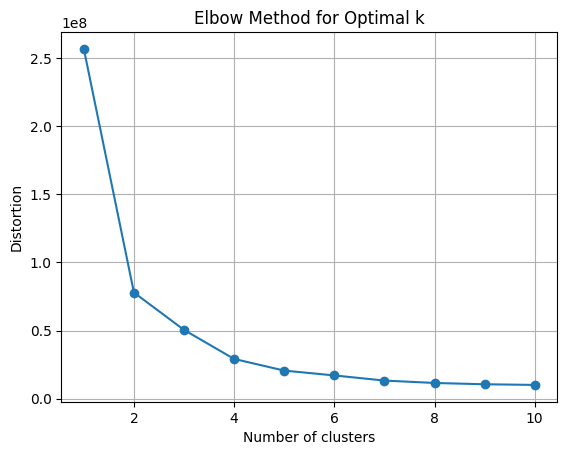

Optimal number of clusters found: 2


In [4]:
# ----- Find optimal k -----
optimal_k = KMeansNew.find_optimal_k(X, max_k=10)
print(f"Optimal number of clusters found: {optimal_k}")

In [5]:
# ----- Apply KMeans with optimal k -----
kmeans = KMeansNew(n_clusters=optimal_k, max_iter=300)
y_pred = kmeans.fit_predict(X)

In [6]:
# ----- Map Clusters to Actual Classes -----
labels = np.zeros_like(y_pred)
for i in range(optimal_k):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

In [7]:
# ----- Evaluate Clustering -----
acc = accuracy_score(y_true, labels)
ari = adjusted_rand_score(y_true, y_pred)
conf_mat = confusion_matrix(y_true, labels)

print("Accuracy Score:", acc)
print("Adjusted Rand Index (ARI):", ari)
print("Confusion Matrix:\n", conf_mat)

Accuracy Score: 0.8541300527240774
Adjusted Rand Index (ARI): 0.49142453622455523
Confusion Matrix:
 [[130  82]
 [  1 356]]
